In [2]:
import geopandas as gpd

# Lade deinen GeoPackage-Layer
gdf = gpd.read_file("processed/geopackage/fehmarnbelt.gpkg", layer="multipolygons")

# Vorschau
gdf.head()

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_level,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,382448,None,Fehmarn,boundary,None,None,8,None,administrative,None,...,None,None,None,None,None,None,None,None,"""TMC:cid_58:tabcd_1:Class""=>""Area"",""TMC:cid_58...","MULTIPOLYGON (((11.08192 54.43867, 11.08207 54..."
1,418101,None,None,multipolygon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((11.0114 54.4821, 11.01348 54.4..."
2,546886,None,Kompostieranlage,multipolygon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,"""alt_name""=>""Klärschlammdeponie"",""landfill:was...","MULTIPOLYGON (((11.17264 54.4956, 11.17467 54...."
3,546887,None,None,multipolygon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((11.17402 54.49377, 11.17438 54..."
4,546888,None,None,multipolygon,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((11.07372 54.4584, 11.07548 54...."


In [3]:
gdf.columns.tolist()

['osm_id',
 'osm_way_id',
 'name',
 'type',
 'aeroway',
 'amenity',
 'admin_level',
 'barrier',
 'boundary',
 'building',
 'craft',
 'geological',
 'historic',
 'land_area',
 'landuse',
 'leisure',
 'man_made',
 'military',
 'natural',
 'office',
 'place',
 'shop',
 'sport',
 'tourism',
 'other_tags',
 'geometry']

In [4]:
gdf["landuse"].value_counts()

landuse
farmyard                   1200
farmland                    964
forest                      406
meadow                      339
residential                 258
grass                       120
cemetery                     33
basin                        26
industrial                   20
construction                 14
commercial                   10
greenhouse_horticulture       9
village_green                 8
greenfield                    6
allotments                    5
military                      3
recreation_ground             3
retail                        3
landfill                      2
animal_keeping                2
orchard                       2
flowerbed                     1
field or pasture              1
railway                       1
vineyard                      1
garages                       1
harbour                       1
quarry                        1
Name: count, dtype: int64

In [5]:
gdf["natural"].value_counts()

natural
water        1393
scrub         668
wetland       109
wood           87
sand           76
grassland      43
beach          24
heath          21
coastline      14
shingle         5
mud             4
bay             3
peninsula       3
stone           3
strait          2
scree           1
tree_row        1
shrubbery       1
Name: count, dtype: int64

In [50]:
import geopandas as gpd
import fiona

gpkg_path = "processed/geopackage/fehmarnbelt.gpkg"

# Verfügbare Layer ausgeben (das hast du bereits)
layers = fiona.listlayers(gpkg_path)
print("📚 Verfügbare Layer:")
for layer in layers:
    print(" -", layer)

# Beispiel: Den Layer 'multipolygons' laden und die ersten Zeilen anzeigen
multipolygons = gpd.read_file(gpkg_path, layer="multipolygons")
print("\n📝 Eigenschaften des Layers 'multipolygons':")
print(multipolygons.head())

# Den Layer 'lines' laden und die ersten Zeilen anzeigen
lines = gpd.read_file(gpkg_path, layer="lines")
print("\n📝 Eigenschaften des Layers 'lines':")
print(lines.head())

# Falls du auch 'points' untersuchen möchtest
points = gpd.read_file(gpkg_path, layer="points")
print("\n📝 Eigenschaften des Layers 'points':")
print(points.head())

📚 Verfügbare Layer:
 - points
 - lines
 - multilinestrings
 - multipolygons
 - other_relations

📝 Eigenschaften des Layers 'multipolygons':
   osm_id osm_way_id              name          type aeroway amenity  \
0  382448       None           Fehmarn      boundary    None    None   
1  418101       None              None  multipolygon    None    None   
2  546886       None  Kompostieranlage  multipolygon    None    None   
3  546887       None              None  multipolygon    None    None   
4  546888       None              None  multipolygon    None    None   

  admin_level barrier        boundary building  ... man_made military natural  \
0           8    None  administrative     None  ...     None     None    None   
1        None    None            None     None  ...     None     None    None   
2        None    None            None     None  ...     None     None    None   
3        None    None            None     None  ...     None     None    None   
4        None    None 

In [51]:
def unique_categories(gdf, columns):
    for col in columns:
        if col in gdf.columns:
            values = gdf[col].dropna().unique()
            print(f"{col}: {sorted(values)}")
        else:
            print(f"{col} ist in diesem Layer nicht vorhanden.")

print("\n=== Kategorien in 'multipolygons' ===")
mp_columns = ["natural", "landuse", "building", "leisure"]
unique_categories(multipolygons, mp_columns)

print("\n=== Kategorien in 'lines' ===")
line_columns = ["highway", "waterway", "railway", "aerialway", "barrier", "man_made"]
unique_categories(lines, line_columns)


=== Kategorien in 'multipolygons' ===
natural: ['bay', 'beach', 'coastline', 'grassland', 'heath', 'mud', 'peninsula', 'sand', 'scree', 'scrub', 'shingle', 'shrubbery', 'stone', 'strait', 'tree_row', 'water', 'wetland', 'wood']
landuse: ['allotments', 'animal_keeping', 'basin', 'cemetery', 'commercial', 'construction', 'farmland', 'farmyard', 'field or pasture', 'flowerbed', 'forest', 'garages', 'grass', 'greenfield', 'greenhouse_horticulture', 'harbour', 'industrial', 'landfill', 'meadow', 'military', 'orchard', 'quarry', 'railway', 'recreation_ground', 'residential', 'retail', 'village_green', 'vineyard']
building: ['agricultural', 'allotment_house', 'apartments', 'barn', 'bridge', 'bungalow', 'carport', 'chapel', 'church', 'civic', 'commercial', 'construction', 'container', 'cowshed', 'demolished', 'detached', 'farm', 'farm_auxiliary', 'fire_station', 'garage', 'garages', 'government', 'greenhouse', 'guardhouse', 'hall', 'hangar', 'hospital', 'hotel', 'house', 'houseboat', 'hut', '

In [53]:
gdf = gpd.read_file("processed/geopackage/fehmarnbelt.gpkg", layer="multipolygons")
gdf.columns

Index(['osm_id', 'osm_way_id', 'name', 'type', 'aeroway', 'amenity',
       'admin_level', 'barrier', 'boundary', 'building', 'craft', 'geological',
       'historic', 'land_area', 'landuse', 'leisure', 'man_made', 'military',
       'natural', 'office', 'place', 'shop', 'sport', 'tourism', 'other_tags',
       'geometry'],
      dtype='object')

In [75]:
boundary = gdf[gdf["type"]=="boundary"]
boundary

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_level,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
0,382448,None,Fehmarn,boundary,None,None,8,None,administrative,None,...,None,None,None,None,None,None,None,None,"""TMC:cid_58:tabcd_1:Class""=>""Area"",""TMC:cid_58...","MULTIPOLYGON (((11.08192 54.43867, 11.08207 54..."
23,3363968,None,None,boundary,None,None,None,None,postal_code,None,...,None,None,None,None,None,None,None,None,"""postal_code""=>""23769"",""postal_code_level""=>""8""","MULTIPOLYGON (((11.08192 54.43867, 11.08207 54..."
35,8351877,None,Nördliche Seeniederung Fehmarn,boundary,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""protect_class""=>""4"",""protection_title""=>""Natu...","MULTIPOLYGON (((11.03615 54.50653, 11.03665 54..."
110,15582622,None,None,boundary,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((11.01415 54.4663, 11.01421 54...."
111,15582623,None,None,boundary,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((11.0133 54.4666, 11.01658 54.4..."


In [58]:
print("natural:", gdf["natural"].unique())
print("landuse:", gdf["landuse"].unique())
print("leisure:", gdf["leisure"].unique())

natural: [None 'water' 'wetland' 'peninsula' 'scrub' 'coastline' 'bay' 'beach'
 'grassland' 'wood' 'heath' 'scree' 'strait' 'sand' 'stone' 'shingle'
 'mud' 'tree_row' 'shrubbery']
landuse: [None 'meadow' 'landfill' 'farmland' 'residential' 'forest' 'grass'
 'farmyard' 'commercial' 'allotments' 'village_green' 'harbour' 'retail'
 'cemetery' 'military' 'railway' 'industrial' 'recreation_ground' 'basin'
 'garages' 'construction' 'greenhouse_horticulture' 'orchard' 'vineyard'
 'animal_keeping' 'greenfield' 'flowerbed' 'field or pasture' 'quarry']
leisure: [None 'nature_reserve' 'playground' 'track' 'park' 'golf_course' 'pitch'
 'water_park' 'garden' 'marina' 'miniature_golf' 'common' 'sports_centre'
 'sauna' 'bird_hide' 'swimming_pool' 'wellness' 'fishing' 'fitness_centre'
 'outdoor_seating' 'trampoline_park' 'horse_riding' 'swimming_area'
 'barefoot' 'indoor_play' 'dog_park']


In [65]:
water = gdf[gdf["natural"]=="water"]

In [68]:
water["name"].unique()

array([None, 'Franckteich', 'westlicher Steinteich', 'Neue Inseln',
       'Püttseer Teich', 'Kampteich', 'Fastensee', 'Mühlenteich',
       'östlicher Steinteich', 'Sulsdorfer Wiek',
       'Sahrensdorfer Binnensee', 'Dorfteich', 'Salzteich', 'Waldteich',
       'Großer Soll', 'Kleiner Soll', 'Schwanenteich', 'Flügger Watt',
       'Dreiecksteich', 'Kollerteich 2', 'Kollerteich 1', 'Neuer Teich',
       'Ratssoll', 'Pastorenteich', 'Ententeich', 'Froschteich',
       'Schauteich', 'Pumpengraben', 'Maschinenkampgraben',
       'südlicher Pumpenzulaufgraben', 'Kopendorfer Au'], dtype=object)

In [91]:
sm = gdf[gdf["name"]=="Fehmarnbelt"]

In [92]:
print(sm.to_string())

     osm_id osm_way_id         name  type aeroway amenity admin_level barrier        boundary building craft geological historic land_area landuse         leisure man_made military natural office place  shop sport tourism                                                                                                                                                                                                                                                                     other_tags                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  geometry
2904   None  1780

In [95]:
gdf[gdf["boundary"]=="protected_area"]

,osm_id,osm_way_id,name,type,aeroway,amenity,admin_level,barrier,boundary,building,...,man_made,military,natural,office,place,shop,sport,tourism,other_tags,geometry
35,8351877,None,Nördliche Seeniederung Fehmarn,boundary,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""protect_class""=>""4"",""protection_title""=>""Natu...","MULTIPOLYGON (((11.03615 54.50653, 11.03665 54..."
112,15583162,None,Naturschutzgebiet Wallnau/Fehmarn,multipolygon,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""communication:amateur_radio:pota""=>""DE-0268"",...","MULTIPOLYGON (((11.01381 54.48102, 11.01401 54..."
2904,None,178089830,Fehmarnbelt,None,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""name:da""=>""Femern Bælt"",""protect_class""=>""4"",...","MULTIPOLYGON (((10.73187 54.51355, 10.75465 54..."
4931,None,329418276,Naturschutzgebiet Grüner Brink,None,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""protect_class""=>""4"",""protection_title""=>""Natu...","MULTIPOLYGON (((11.16014 54.52042, 11.15982 54..."
4932,None,329418278,Naturschutzgebiet Krummsteert-Sulsdorfer Wiek/...,None,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""protect_class""=>""4"",""protection_title""=>""Natu...","MULTIPOLYGON (((11.01843 54.43512, 11.02102 54..."
7972,None,491184040,Markelsdorfer Huk,None,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""access""=>""no"",""protect_class""=>""4"",""wikipedia...","MULTIPOLYGON (((11.06664 54.5358, 11.06737 54...."
29544,None,1201837815,Hyllekrog Vildtreservat,None,None,None,None,None,protected_area,None,...,None,None,None,None,None,None,None,None,"""related_law""=>""BEK nr 585 af 13/05/2017"",""rel...","MULTIPOLYGON (((11.47193 54.61766, 11.4713 54...."


Gefundene Barrier-Features: 1012
Einzigartige barrier-Werte: ['hedge' 'fence' 'wall' 'retaining_wall' 'yes' 'chain' 'gate' 'ditch'
 'earthwall' 'guard_rail' 'bollard']


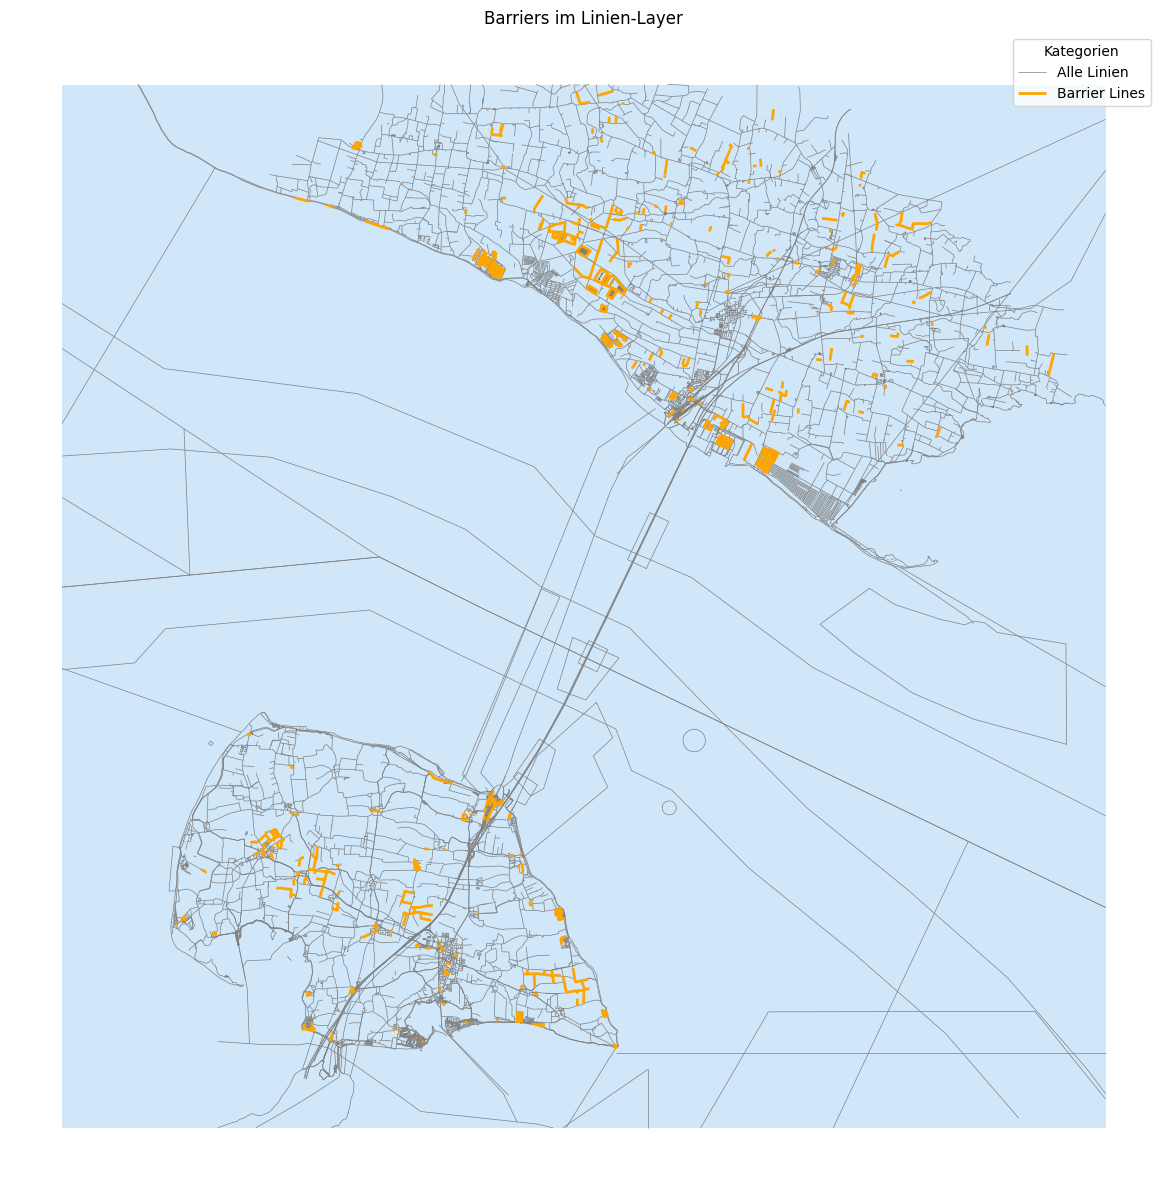

In [96]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import box
import os

# Regionen-Parameter
region = "fehmarnbelt"
gpkg_path = f"processed/geopackage/{region}.gpkg"
buffer_path = f"processed/geojson/{region}_buffer.geojson"

# Prüfe, ob die Dateien existieren
if not os.path.exists(gpkg_path) or not os.path.exists(buffer_path):
    print("❌ Fehlende Datei(en).")
    exit(1)

# Lade den Buffer und projiziere auf Web Mercator (EPSG:3857)
buffer = gpd.read_file(buffer_path)
crs = "EPSG:3857"
buffer = buffer.to_crs(crs)

# Erstelle die BoundingBox anhand des Buffers
bbox_geom = buffer.total_bounds
bbox = gpd.GeoDataFrame(geometry=[box(*bbox_geom)], crs=crs)

# Lade den Linien-Layer und clippe ihn auf die BoundingBox
lines = gpd.read_file(gpkg_path, layer="lines").to_crs(crs)
lines = gpd.clip(lines, bbox)

# Definiere die Liste der barrier-Werte, die angezeigt werden sollen
barrier_list = ['bollard', 'chain', 'ditch', 'earthwall', 'fence', 'gate', 
                'guard_rail', 'hedge', 'retaining_wall', 'wall', 'yes']

# Filtere die Linien, bei denen der Wert in "barrier" in der barrier_list enthalten ist
barrier_lines = lines[lines["barrier"].isin(barrier_list)]
print(f"Gefundene Barrier-Features: {len(barrier_lines)}")
print("Einzigartige barrier-Werte:", barrier_lines["barrier"].unique())

# Erstelle den Plot
fig, ax = plt.subplots(figsize=(12, 12))

# Zeichne optional die BoundingBox als Hintergrund (z.B. weiches Blau)
bbox.plot(ax=ax, color="#d0e7f9", zorder=0)

# Zeichne alle Linien (zum Vergleich, in leichtem Grau)
lines.plot(ax=ax, color="gray", linewidth=0.5, zorder=1, label="Alle Linien")

# Zeichne die Barrier-Linien besonders – z.B. in Orange und etwas dicker
barrier_lines.plot(ax=ax, color="orange", linewidth=2, zorder=2, label="Barrier Lines")

ax.set_title("Barriers im Linien-Layer")
ax.axis("off")
ax.legend(title="Kategorien")
plt.tight_layout()
plt.show()